In [1]:
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2

import os 
print(os.getcwd()) 
    
#import hepran
#import hepran.bzipscore as bz
#import hepran.bcipa as bc
#import hepran.utils as u
#import hepran.registers as r
#import hepran.agadir as ag

import pandas as pd
import numpy as np
import seaborn as sns
    
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt

import sklearn as sk


CCO = os.environ.get("CCO",r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")


def getRMSE(x, y, df):
    return np.sqrt(((df[x]-df[y])**2).mean())

D:\data\ortoCC\fine_tune_scoring_function


In [2]:
df = pd.read_excel('data/round0_fiting.xlsx',index_col=[0,1])

In [3]:
df.head(5)
df.columns

Index([u'seq1', u'seq2', u'Tm', u'on_target', u'avg_HP1', u'avg_HP2',
       u'avg_HP_12', u'HP1', u'HP2', u'HP_12', u'c_NN', u'c_IN', u'c_II',
       u'es_EE', u'es_EK', u'es_KK'],
      dtype='object')

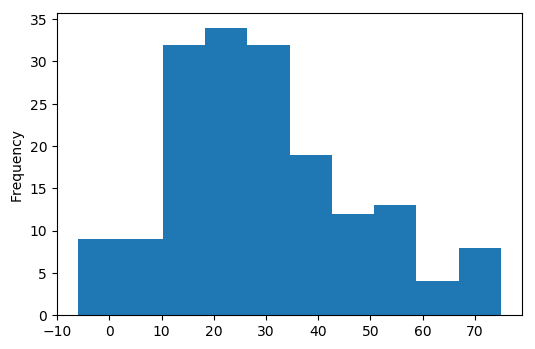

In [4]:
df.Tm.plot.hist()

In [5]:

#Q = df['HP_12 c_NN c_IN c_II es_EE es_EK es_KK Tm on_target'.split()]
Q = df.query('(Tm > 25)')
print(len(Q))
Q.head()


95


seq1                           seq2  Tm  \
ID1 ID2                                                                     
O1  O2   DKNAALKAENAALEYEIAALEAEIAALEG  DENAALEAKNAALKYKIAALKAKIAALKG  72   
O2  O2   DENAALEAKNAALKYKIAALKAKIAALKG  DENAALEAKNAALKYKIAALKAKIAALKG  34   
    O3   DENAALEAKNAALKYKIAALKAKIAALKG  DEIAALEAKIAALKYENAALEAENAALEG  27   
O3  O4   DEIAALEAKIAALKYENAALEAENAALEG  DKIAALKAEIAALEYKNAALKAKNAALKG  68   
O2  O5   DENAALEAKNAALKYKIAALKAKIAALKG  DENAALEAEIAALEYKNAALKAEIAALEG  30   

         on_target   avg_HP1   avg_HP2  avg_HP_12    HP1    HP2  HP_12  c_NN  \
ID1 ID2                                                                        
O1  O2        True  1.286897  1.237241   1.262069  37.32  35.88  73.20     2   
O2  O2       False  1.237241  1.237241   1.237241  35.88  35.88  71.76     2   
    O3       False  1.237241  1.286897   1.262069  35.88  37.32  73.20     0   
O3  O4        True  1.286897  1.237241   1.262069  37.32  35.88  73.20     2   
O2  O5       False  1.237241  1.286897   1.262069  35.88  37.32  73.20     1   

         c_IN  c_II  es_EE  es_EK  es_KK  
ID1 ID2                                   
O1  O2      0     2      0      8      0  
O2  O2      0     2      2      0      6  
    O3      4     0      2      4      2  
O3  O4      0     2      0      8      0  
O2  O5      2     1      2      4      2

In [6]:
import statsmodels.formula.api as sm



Y=Q['Tm']
X=Q['c_NN c_IN c_II es_EE es_EK es_KK'.split()] 
#X = sm.add_constant(X)
model = sm.ols(formula="Tm ~ c_NN + c_IN + c_II + es_EE + es_EK + es_KK", data=Q)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     Tm   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     23.35
Date:                Fri, 26 Jan 2018   Prob (F-statistic):           2.69e-11
Time:                        14:31:39   Log-Likelihood:                -354.21
No. Observations:                  95   AIC:                             716.4
Df Residuals:                      91   BIC:                             726.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3815      0.054     25.604      0.0

In [7]:
Q['Tm_pred'] = results.predict(Q)


C:\bin\python\anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
 results.predict(Q)

ID1  ID2
O1   O2     59.907474
O2   O2     32.914022
     O3     32.155202
O3   O4     59.907474
O2   O5     39.814230
O3   O5     41.939252
O4   O5     39.814230
O2   O6     37.689208
O3   O6     39.814230
O4   O6     37.689208
O5   O6     59.907474
O1   O7     39.814230
O5   O7     32.155202
O2   O8     39.814230
O5   O8     34.280224
O6   O8     32.155202
O7   O8     59.907474
O2   O9     47.473259
O4   O9     44.589417
O6   O9     39.814230
O1   O10    47.473259
O10  O2     45.348237
     O4     17.595964
     O5     39.814230
     O6     37.689208
     O7     37.689208
     O8     39.814230
     O9     59.907474
     O10    32.914022
O11  O2     44.589417
              ...    
O12  O15    39.814230
O13  O15    32.155202
O16  O8     47.473259
O10  O16    37.689208
O14  O16    32.155202
O15  O16    59.907474
Q1   Q1     35.039044
     Q2     59.907474
     Q4     30.030180
Q2   Q4     30.030180
Q3   Q4     59.907474
Q1   Q5     39.814230
Q2   Q5     39.814230
Q4   Q5     37.689208
Q

10.069962942847752

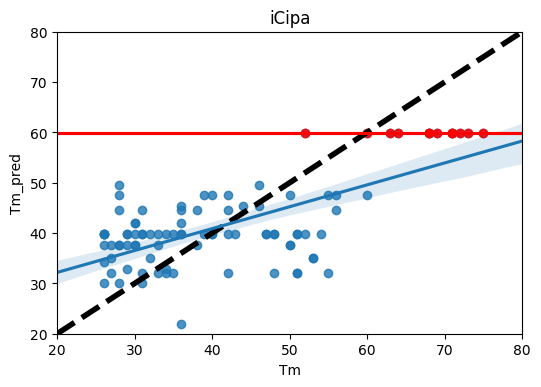

In [12]:
plt.plot([20,80], [20,80], 'k--', lw=4)
plt.title('iCipa')
plt.ylim([20,80])
plt.xlim([20,80])

sns.regplot(x='Tm', y='Tm_pred', fit_reg=True, data=Q)
sns.regplot(x='Tm', y='Tm_pred', fit_reg=True, data=Q.query('on_target'), color='red')

getRMSE('Tm', 'Tm_pred', Q)

In [9]:
Q.query('on_target == False')

seq1                           seq2  Tm  \
ID1 ID2                                                                     
O2  O2   DENAALEAKNAALKYKIAALKAKIAALKG  DENAALEAKNAALKYKIAALKAKIAALKG  34   
    O3   DENAALEAKNAALKYKIAALKAKIAALKG  DEIAALEAKIAALKYENAALEAENAALEG  27   
    O5   DENAALEAKNAALKYKIAALKAKIAALKG  DENAALEAEIAALEYKNAALKAEIAALEG  30   
O3  O5   DEIAALEAKIAALKYENAALEAENAALEG  DENAALEAEIAALEYKNAALKAEIAALEG  30   
O4  O5   DKIAALKAEIAALEYKNAALKAKNAALKG  DENAALEAEIAALEYKNAALKAEIAALEG  36   
O2  O6   DENAALEAKNAALKYKIAALKAKIAALKG  DKNAALKAKIAALKYENAALEAKIAALKG  30   
O3  O6   DEIAALEAKIAALKYENAALEAENAALEG  DKNAALKAKIAALKYENAALEAKIAALKG  33   
O4  O6   DKIAALKAEIAALEYKNAALKAKNAALKG  DKNAALKAKIAALKYENAALEAKIAALKG  38   
O1  O7   DKNAALKAENAALEYEIAALEAEIAALEG  DKIAALKAKNAALKYKIAALKAENAALEG  34   
O5  O7   DENAALEAEIAALEYKNAALKAEIAALEG  DKIAALKAKNAALKYKIAALKAENAALEG  35   
O2  O8   DENAALEAKNAALKYKIAALKAKIAALKG  DEIAALEAENAALEYEIAALEAKNAALKG  51   
O5  O8   DENAALEAEIAALEYKNAALKAEIAALEG  DEIAALEAENAALEYEIAALEAKNAALKG  26   
O6  O8   DKNAALKAKIAALKYENAALEAKIAALKG  DEIAALEAENAALEYEIAALEAKNAALKG  48   
O2  O9   DENAALEAKNAALKYKIAALKAKIAALKG  DENAALEAKNAALKYEIAALEAEIAALEG  56   
O4  O9   DKIAALKAEIAALEYKNAALKAKNAALKG  DENAALEAKNAALKYEIAALEAEIAALEG  28   
O6  O9   DKNAALKAKIAALKYENAALEAKIAALKG  DENAALEAKNAALKYEIAALEAEIAALEG  40   
O1  O10  DKNAALKAENAALEYEIAALEAEIAALEG  DKNAALKAENAALEYKIAALKAKIAALKG  42   
O10 O2   DKNAALKAENAALEYKIAALKAKIAALKG  DENAALEAKNAALKYKIAALKAKIAALKG  46   
    O4   DKNAALKAENAALEYKIAALKAKIAALKG  DKIAALKAEIAALEYKNAALKAKNAALKG  32   
    O5   DKNAALKAENAALEYKIAALKAKIAALKG  DENAALEAEIAALEYKNAALKAEIAALEG  48   
    O6   DKNAALKAENAALEYKIAALKAKIAALKG  DKNAALKAKIAALKYENAALEAKIAALKG  27   
    O7   DKNAALKAENAALEYKIAALKAKIAALKG  DKIAALKAKNAALKYKIAALKAENAALEG  29   
    O8   DKNAALKAENAALEYKIAALKAKIAALKG  DEIAALEAENAALEYEIAALEAKNAALKG  29   
    O10  DKNAALKAENAALEYKIAALKAKIAALKG  DKNAALKAENAALEYKIAALKAKIAALKG  29   
O11 O2   DKIAALKAEIAALEYENAALEAENAALEG  DENAALEAKNAALKYKIAALKAKIAALKG  38   
    O4   DKIAALKAEIAALEYENAALEAENAALEG  DKIAALKAEIAALEYKNAALKAKNAALKG  50   
O10 O11  DKNAALKAENAALEYKIAALKAKIAALKG  DKIAALKAEIAALEYENAALEAENAALEG  31   
O1  O12  DKNAALKAENAALEYEIAALEAEIAALEG  DEIAALEAKIAALKYKNAALKAKNAALKG  36   
O12 O3   DEIAALEAKIAALKYKNAALKAKNAALKG  DEIAALEAKIAALKYENAALEAENAALEG  60   
    O4   DEIAALEAKIAALKYKNAALKAKNAALKG  DKIAALKAEIAALEYKNAALKAKNAALKG  36   
...                                ...                            ...  ..   
O15 O5   DEIAALEAENAALEYKIAALKAENAALEG  DENAALEAEIAALEYKNAALKAEIAALEG  36   
    O6   DEIAALEAENAALEYKIAALKAENAALEG  DKNAALKAKIAALKYENAALEAKIAALKG  31   
    O7   DEIAALEAENAALEYKIAALKAENAALEG  DKIAALKAKNAALKYKIAALKAENAALEG  40   
    O8   DEIAALEAENAALEYKIAALKAENAALEG  DEIAALEAENAALEYEIAALEAKNAALKG  28   
O10 O15  DKNAALKAENAALEYKIAALKAKIAALKG  DEIAALEAENAALEYKIAALKAENAALEG  26   
O12 O15  DEIAALEAKIAALKYKNAALKAKNAALKG  DEIAALEAENAALEYKIAALKAENAALEG  26   
O13 O15  DKNAALKAKIAALKYKNAALKAEIAALEG  DEIAALEAENAALEYKIAALKAENAALEG  51   
O16 O8   DKIAALKAKNAALKYEIAALEAKNAALKG  DEIAALEAENAALEYEIAALEAKNAALKG  28   
O10 O16  DKNAALKAENAALEYKIAALKAKIAALKG  DKIAALKAKNAALKYEIAALEAKNAALKG  28   
O14 O16  DENAALEAEIAALEYENAALEAKIAALKG  DKIAALKAKNAALKYEIAALEAKNAALKG  34   
Q1  Q1   DENAALEAKNAALKYKIAALKAEIAALEG  DENAALEAKNAALKYKIAALKAEIAALEG  32   
    Q4   DENAALEAKNAALKYKIAALKAEIAALEG  DKIAALKAKIAALKYKNAALKAKNAALKG  28   
Q2  Q4   DKNAALKAENAALEYEIAALEAKIAALKG  DKIAALKAKIAALKYKNAALKAKNAALKG  31   
Q1  Q5   DENAALEAKNAALKYKIAALKAEIAALEG  DKNAALKAEIAALEYKIAALKAENAALEG  31   
Q2  Q5   DKNAALKAENAALEYEIAALEAKIAALKG  DKNAALKAEIAALEYKIAALKAENAALEG  47   
Q4  Q5   DKIAALKAKIAALKYKNAALKAKNAALKG  DKNAALKAEIAALEYKIAALKAENAALEG  50   
Q5  Q5   DKNAALKAEIAALEYKIAALKAENAALEG  DKNAALKAEIAALEYKIAALKAENAALEG  53   
Q1  Q6   DENAALEAKNAALKYKIAALKAEIAALEG  DENAALEAKIAALKYEIAALEAKNAALKG  39   
Q2  Q6   DKNAALKAENAALEYEIAALEAKIAALKG  DENAALEAKIAALKYEIAALEAKNAALKG  52   
Q3  Q6   DEIAALEAEIAALEYENAALE

In [10]:
Q.query('on_target == False and Tm>=60')

,,seq1,seq2,Tm,on_target,avg_HP1,avg_HP2,avg_HP_12,HP1,HP2,HP_12,c_NN,c_IN,c_II,es_EE,es_EK,es_KK,Tm_pred
ID1,ID2,,,,,,,,,,,,,,,,,
O12,O3,DEIAALEAKIAALKYKNAALKAKNAALKG,DEIAALEAKIAALKYENAALEAENAALEG,60,False,1.237241,1.286897,1.262069,35.88,37.32,73.2,2,0,2,2,4,2,47.473259
